<a href="https://colab.research.google.com/github/ivyclare/Project-50_Projects_In_Deep_Learning/blob/master/Deep_Flowers_A_Step_By_Step_Guide_To_Completing_Hackathon_Blossom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEEP FLOWERS 

How can you teach a computer to recognize different flower species? Would you like to take a picture of any flower and your phone automatically tells you what species of flower it is? 

If this excites then you are in the right place. We are going to write a model that can recognize 102 different species of flowers.  

*Side Note*

As part of the 5000 students selected for Secure and Private AI Scholarship Challenge on Udacity sponsored by facebook, 4 amazing ladies and myself from different parts of the world, decided to organize weekend hackathons. 48hrs of solving a problem with Pytorch, having fun and competing against each other. I am proud to say in our first hackathon, we had 41 awesome teams who were very dedicated and made the hackathon a success. 
This project was our very first project for the hackathon which we named **Hackathon Blossom**, since we were going to blossom with the flowers. 

I can go on and on about this amazing opportunity and the amazing community there. I better stop here and go back to our goal for today :) 

## Getting Started 
We would be using a neural network to accomplish our goal. To be more precise we will be using a very deep neural network hence the name **deep flowers**

This tutorial is divided into 2 parts:

**Part 1: Building a flower classifier**

**Part 2: Deploying the classifier**


## Building A Flower Classifier

*Prerequisites:*

Some knowledge in the following in order to follow up:
- *Python* - A great resource for getting started with Python can be found [here]()
- *Convolutional Neural Networks* - Andrew provides a great [explanation]() on CNNs
- We will be using *Pytorch* in this tutorial


We would be using a method called **Transfer Learning** to train our classifier.

### What is Transfer Learning?
ssafjlafjafjajfajldkkcnacnanc

Transfer learning is way by which models 


We will build our model using the following steps:
1. Perform Transformations and Load data 
2. Build the Model
3. Train the Model
4. 



### Import Libraries

Here we just load the libraries and make sure GPU is turned on. Since we will be using pretrained models which are very deep networks, training on CPU is not really an option. 

If your GPU is off and you using Colab, on your notebook go to *Edit => Notebook Settings* . Make sure the *Runtime* is set to  *Python 3* and under *Hardware Accelerator* choose *GPU*

**The GPU uses cuda .....**

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
from torchvision import datasets,transforms,models
from torch import nn,optim
import torch.nn.functional as F
from torch.utils.data import *


import time
import json
import copy
import os

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import PIL

from PIL import Image
from collections import OrderedDict


# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


### Perform Transformations and Load Dataset 

Now that our libraries are imported , we load our dataset from [Kaggle]() . This dataset contains 102 flower species. 

Here, we download the dataset and load them using Pytorch DataLoaders. We download the data directly into google drive, hence we have to get authorized  access


We also have to move the test_set directory into the flowers directory because PyTorch requires the images to be inside a folder with the class name and create a new directory for all the image labels. For example, if working on dogs vs cats dataset, Train directory should be like: `train/dogs/image.jpg` and `train/cats/image.jpg`

In [0]:
from google.colab import drive
drive.mount('/content/drive')
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 cat_to_name.json   flower_data.zip				 'test set'
 drive		    hackathon-blossom-flower-classification.zip  'test set.zip'
 flower_data	    sample_data


In [0]:
# # Downloading the data from Kaggle

# !pip install kaggle

# !mkdir .kaggle

# import json
# token = {"username":"ivyclare","key":"17ee8bd3b41486d62e7eb9257bd812d4"}
# with open('/content/.kaggle/kaggle.json', 'w') as file:
#     json.dump(token, file)

# !chmod 600 /content/.kaggle/kaggle.json

# !cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
 
 
# !kaggle config set -n path -v{/content}

# !kaggle datasets download -d spaics/hackathon-blossom-flower-classification -p /content
!unzip \*.zip

# #!unzip \*.zip
# # # !ls

Archive:  flower_data.zip
   creating: flower_data/
   creating: flower_data/valid/
   creating: flower_data/valid/61/
  inflating: flower_data/valid/61/image_06296.jpg  
  inflating: flower_data/valid/61/image_06293.jpg  
  inflating: flower_data/valid/61/image_06292.jpg  
  inflating: flower_data/valid/61/image_06261.jpg  
  inflating: flower_data/valid/61/image_06259.jpg  
  inflating: flower_data/valid/61/image_06273.jpg  
   creating: flower_data/valid/95/
  inflating: flower_data/valid/95/image_07513.jpg  
  inflating: flower_data/valid/95/image_07512.jpg  
  inflating: flower_data/valid/95/image_07510.jpg  
  inflating: flower_data/valid/95/image_07471.jpg  
  inflating: flower_data/valid/95/image_07475.jpg  
  inflating: flower_data/valid/95/image_07502.jpg  
  inflating: flower_data/valid/95/image_07588.jpg  
  inflating: flower_data/valid/95/image_07575.jpg  
  inflating: flower_data/valid/95/image_07585.jpg  
  inflating: flower_data/valid/95/image_07580.jpg  
  inflating: f

In [0]:
# # ## Moving test set.zip to flower_data and create new folder called 1
# !mv test\ set flower_data
# !mkdir flower_data/test\ set/1
# !mv flower_data/test\ set/* flower_data/test\ set/1

!mkdir flower_data/test
!mkdir flower_data/test/1
!mv test\ set/* flower_data/test/1/


Now that the dataset is downloaded, we perform transformations on the data. Transformations is converting the data from one form to another.  We are going to apply 2 main transformations to our images:

**- Data Augmentation**

In the real world, data is usually not balanced

**- Data Normalization**


Note that for the validation and test data, we do not do the RandomResizedCrop, RandomRotation and RandomHorizontalFlip transformations. Instead, we just resize the validation images to 256×256 and crop out the center 224×224 in order to be able to use them with the pretrained model. Then the image is transformed into a tensor and normalized by the mean and standard deviation of all images in ImageNet.



In [0]:
data_dir = 'flower_data'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir +'/test set'

# Tansform with data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomRotation(30),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    
    'test': transforms.Compose([
        transforms.Resize(256),                                  
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
    ]),
}


# Load the datasets with ImageFolder
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                  data_transforms[x])for x in ['train', 'valid', 'test']}

# Using the image datasets and the trainforms, define the dataloaders
batch_size = 16
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                             shuffle=True, num_workers=2)
              for x in ['train', 'valid', 'test']}

class_names = image_datasets['train'].classes

### Label Mapping
We need to **create a mapping** from the actual flower name (given in the json file) to the label number(a number between 1 and 102)

In [0]:
with open('cat_to_name.json', 'r') as f:
    label_map = json.load(f)

### Visualize Our Images
We can now load and visualize our data. A method imshow() is provided to display our images.



 Sizes of Datasets:  {'train': 6552, 'valid': 818, 'test': 206}
 Image Size torch.Size([16, 3, 224, 224])
 label: 97, class: 95, name: bougainvillea


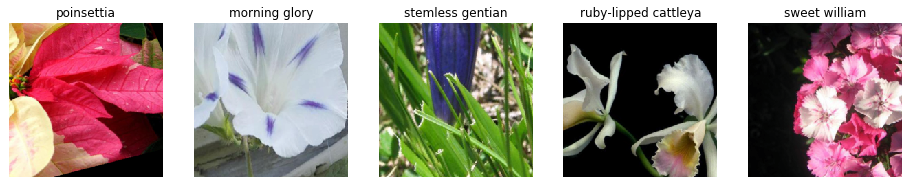

In [0]:
## Method to display Image for Tensor
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    return ax

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid','test']}
print(" Sizes of Datasets: ", dataset_sizes)
# Displaying Images and other info about the test set
images, labels = next(iter(dataloaders['train']))
print(" Image Size",images.size())
rand_idx = np.random.randint(len(images))
print(" label: {}, class: {}, name: {}".format(labels[rand_idx].item(),
                                               class_names[labels[rand_idx].item()],
                                               label_map[class_names[labels[rand_idx].item()]]))

fig, axes = plt.subplots(figsize=(16,5), ncols=5)
for ii in range(5):
    ax = axes[ii]
    ax.set_title(label_map[class_names[labels[ii].item()]])
    imshow(images[ii], ax=ax, normalize=True)

In [0]:
### Looking at the number of images in each class

def images_per_class(labels_count=None, phase = 'train'):
    if (labels_count is None):
        labels_count = get_count_per_class(phase)
    plt.figure()
    f, ax = plt.subplots(figsize=(25,10))
    plt.bar(np.arange(102), labels_count)
    plt.xticks(np.arange(102), np.arange(102))
    plt.ylabel("No. of samples")
    plt.xlabel("Classes")
    plt.title(phase)
    plt.show()

### Building and Training The Model

As earlier mentioned, we are going to used a pretrained model based on ImageNet. 

The steps we are going to use for our pre-trained model is:

1. Load the pre-trained model
2. Freeze parameters convolutional layers
3. Replace the fully connected layers with a custom classifier
4. Train the custom classifier

We are going to try out different architectures; **densenet161**,  **resnet121** and  **vggnet** architecture

#### Load the Pre-trained Model

In [0]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_name = 'densenet' #vgg
if model_name == 'densenet':
    model = models.densenet161(pretrained=True)
    num_in_features = 2208
    print(model)
elif model_name == 'vgg':
    model = models.vgg19(pretrained=True)
    num_in_features = 25088
    print(model.classifier)
elif model_name == 'resnet':
    model = models.resnet152(pretrained=True)
    num_in_features = 2048
    print(model)
else:
    print("Unknown model, please choose 'densenet' or 'vgg'")

# model = models.densenet161(pretrained=True)
#model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inpla

#### Freezing Parameters and Creating Custum Classifier



We have to freeze parameters so we don't backprop through them. This will allow us to keep the pre-trained weights for early convolutional layers (whose purpose here is for feature extraction). 

We then define our fully-connected network which will have the same inputs as our pretrained neuron, a custom hidden layer and our output.

The activation function and dropout are also defined to 



In [0]:
#Freezing model parameters and defining the fully connected network to be attached to the model, loss function and the optimizer.
#We there after put the model on the GPUs
for param in model.parameters():
  param.require_grad = False
  
# Create Custom Classifier
def build_classifier(num_in_features, hidden_layers, num_out_features):
   
    classifier = nn.Sequential()
    if hidden_layers == None:
      
        classifier.add_module('fc0', nn.Linear(num_in_features, 102))
        
    else:
      
        layer_sizes = zip(hidden_layers[:-1], hidden_layers[1:])
        classifier.add_module('fc0', nn.Linear(num_in_features, hidden_layers[0]))
        classifier.add_module('relu0', nn.ReLU())
        classifier.add_module('drop0', nn.Dropout(.6))
        
#         classifier.add_module('relu1', nn.ReLU())
#         classifier.add_module('drop1', nn.Dropout(.5))
        
        for i, (h1, h2) in enumerate(layer_sizes):
            classifier.add_module('fc'+str(i+1), nn.Linear(h1, h2))
            classifier.add_module('relu'+str(i+1), nn.ReLU())
            classifier.add_module('drop'+str(i+1), nn.Dropout(.5))
        classifier.add_module('output', nn.Linear(hidden_layers[-1], num_out_features))
        
    return classifier

In [0]:
hidden_layers = None #None#[4096, 1024, 256][512, 256, 128]

classifier = build_classifier(num_in_features, hidden_layers, 102)
print(classifier)

 # Defining model hyperparameters
if model_name == 'densenet':
    model.classifier = classifier
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adadelta(model.parameters()) # Adadelta #weight optim.Adam(model.parameters(), lr=0.001, momentum=0.9)
    #optimizer_conv = optim.SGD(model.parameters(), lr=0.0001, weight_decay=0.001, momentum=0.9)
   # Decay LR by a factor of 0.1 every 4 epochs
    sched = optim.lr_scheduler.StepLR(optimizer, step_size=4)
elif model_name == 'vgg':
    model.classifier = classifier
    criterion = nn.NLLLoss()
    optimizer = optim.Adam(model.classifier.parameters(), lr=0.0001)
    sched = optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.1)
elif model_name == 'resnet':
    model.fc = classifier
    criterion = nn.NLLLoss()
    optimizer = optim.Adam(model.fc.parameters(), lr=0.01)
    #sched = optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.1)
else:
    pass

Sequential(
  (fc0): Linear(in_features=2208, out_features=102, bias=True)
)


#### Training the Model

In order to train our model with Pytorch, we general perform the following steps while iterating through each epoch:

- Make a forward pass through the network using   `forward(images) `
- Use the network output in the `criterion` function to calculate the loss 
- Perform a backward pass through the network with `loss.backward()` to calculate the gradients
- Take a step with the optimizer to update the weights `optimizer.step()`

`optimizer.zero_grad()` is used to clear accumulated gradients


A technique called **early stopping** is used to prevent overfitting. It causes the training to stop when the performance on the validation dataset begins to fall. 

keeps track of the best accuracy achieved so far, and saves the best accuracy model and full model (along with its hyper-parameters and other variables to disk as a checkpoint). Checkpoints can be restored and training continued later if power is lost or training is disrupted due to some reason.

The model is adapted from https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html


In [0]:
def train_model(model, criterion, optimizer, sched, num_epochs=5,device='cuda'):
    start = time.time()
    train_results = []
    valid_results = []
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        
        print('-' * 10)
        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        #sched.step()
                        loss.backward()
                        
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            
            # calculate average time over an epoch
            #elapshed_epoch = time.time() - start/            
            #print('Epoch {}/{} - completed in: {:.0f}m {:.0f}s'.format(epoch+1, num_epochs,elapshed_epoch // 60, elapshed_epoch % 60))
            
            if(phase == 'train'):
              train_results.append([epoch_loss,epoch_acc])
            if(phase == 'valid'):
              valid_results.append([epoch_loss,epoch_acc])
                                   
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model (Early Stopping) and Saving our model, when we get best accuracy
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())       
                #print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,valid_loss))
                #model_save_name = "ResNetDeepFlowers.pt"
                model_save_name = "DenseDeepFlowers.pt"
                path = F"/content/drive/My Drive/{model_save_name}"
                torch.save(model.state_dict(), path)        

        print()

    time_elapsed = time.time() - start
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    #load best model weights
    model.load_state_dict(best_model_wts)
    
    return model,train_results,valid_results

In [0]:
# epochs = 30
# model.to(device)
# model,train_results,valid_results = train_model(model, criterion, optimizer, sched, epochs)

# #https://medium.com/@josh_2774/deep-learning-with-pytorch-9574e74d17ad

This looks promising. The model appears to be learning with each epoch.
Additionally, it doesn’t appear that our model is overfitting (at least too much), since the training and validation metrics are not diverging too much.

I found that changing the number of epochs, the optimizer, and the scheduler had the greatest impact on my results.

Once I felt comfortable with the ending results, which had a validation accuracy of approximately 91% across all the flower types, I could do one final check of the accuracy on the test data. (TO BE CHANGED)

### Training Plots
Plotting the Training loss against the accuracy loss to see how our model performs

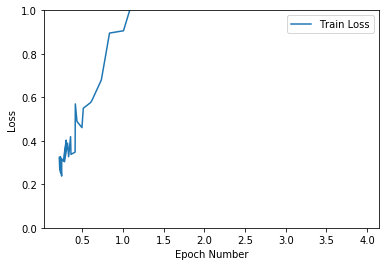

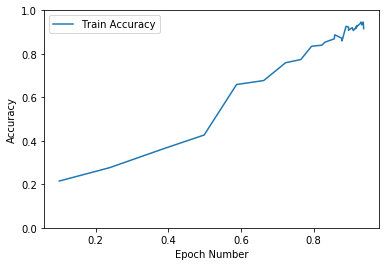

In [0]:
# Plot of Losses
train_results = np.array(train_results)
valid_results = np.array(valid_results)
plt.plot(train_results[:,0],valid_results[:,0])
plt.legend(['Train Loss', 'Valid Loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.ylim(0,1)
plt.show()

#Plot of Accuracies
plt.plot(train_results[:,1],valid_results[:,1])
plt.legend(['Train Accuracy', 'Valid Accuracy'])
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()

### Testing The Model

After patiently waiting for the training process to finish and saving checkpoints of best model parameters, let’s load the checkpoint and test the performance of the model on the unseen data (test data).

#### Loading the saved model


In [0]:
#reload model
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model=torch.load('aerialmodel.pth')
# model.eval()
# model

model.load_state_dict(torch.load('/content/drive/My Drive/DeepFlowers.pt'))
model.to(device)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inpla

### Testing With Test Samples

In [0]:
# Load the datasets with ImageFolder
data_dir = 'flower_data'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir +'/test set'
test_dirs = data_dir +'/test/1'


# Using the image datasets and the trainforms, define the dataloaders
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                   data_transforms[x])for x in ['train', 'valid', 'test']}

dataloaders = torch.utils.data.DataLoader(image_datasets['test'], batch_size=len(image_datasets['test']),
                                             shuffle=True, num_workers=2)

with torch.no_grad():
  print("Predictions on Test Set:")
  model.eval()
  # test_data = next(iter(dataloaders['test']))
  
  image_names = []
  for index in dataloaders.dataset.imgs:
    image_names.append(index[0].split('/')[-1])

  results = []
  file_names = []
  predicted_flower = []
  predicted_class = []

  for inputs, labels in dataloaders:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    _, pred = torch.max(outputs, 1) 
    
    for i in pred:
      file_names.append(image_names[i])
      predicted_flower.append(int(pred[i]))
      predicted_class.append(label_map[str(int(pred[i]))])
      results.append((file_names, predicted_flower,predicted_class))

df = pd.DataFrame({'Image Name': image_names, 'Class ID': predicted_flower, 'Flower Name': predicted_class})
pd.set_option('display.max_colwidth', -1)

df = df.sort_values(by=['Image Name']) 
df.to_csv('/content/drive/My Drive/test_predictions1.csv')
df

Predictions on Test Set:


,Image Name,Class ID,Flower Name
0,aa1.jpg,98,mexican petunia
1,aa10.jpg,89,watercress
2,aa11.jpg,84,columbine
3,aa12.jpg,92,bee balm
4,aa13.jpg,51,petunia
5,aa14.jpg,31,carnation
6,aa15.jpg,98,mexican petunia
7,aa16.jpg,98,mexican petunia
8,aa17.jpg,64,silverbush
9,aa18.jpg,86,tree mallow
